In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

def createStates(stationCapacity, maxArrivals):
    S = []
    V_t1 = {}
    V_t = {}
    newPolicy = {}
    oldPolicy = {}
    for state1 in range(0, stationCapacity + 1):
        for state2 in range(0, stationCapacity + 1):
            for state3 in range(0, stationCapacity + 1):
                for state4 in range(0, stationCapacity + 1):
                    for state5 in range(0, stationCapacity + 1):
                        S.append([state1, state2, state3, state4, state5])
                        V_t1[(state1, state2, state3, state4, state5)] = 0
                        V_t[(state1, state2, state3, state4, state5)] = 0
                        newPolicy[(state1, state2, state3, state4, state5)] = random.randint(0,1)
                        oldPolicy[(state1, state2, state3, state4, state5)] = random.randint(0,1)
                        
    
    E = []
    for env1 in range(1, maxArrivals + 1):
        for env2 in range(1, maxArrivals + 1):
            for env3 in range(1, maxArrivals + 1):
                for env4 in range(1, maxArrivals + 1):
                    for env5 in range(1, maxArrivals + 1):
                        E.append([env1, env2, env3, env4, env5])
    return S, V_t1, V_t, newPolicy, oldPolicy, E

def getReward(c_f, c_h, a, s, K, stationCapacity):
    return a * c_f + sum(getNextState(a, s, K, stationCapacity) * c_h)

def getNextState(a, s, K, stationCapacity, env=np.array([0,0,0,0,0])):
    s=np.clip(np.add(s, env), 0, stationCapacity)
    s_prime = s.copy()
    if a == 1:
        for i in range(len(s_prime)-1, -1, -1):
            s_prime[i] = max(s_prime[i] - K, 0)
            K -= np.abs(s[i] - s_prime[i])
    return s_prime

def getExpectedValue(environments, state, S, action, shuttleCapacity, stationCapacity, V_prime, reward, discount):
    value = 0
    for env in environments:
        s_prime = getNextState(action, state, shuttleCapacity, stationCapacity, env)
        # calculate the expectation given the uniform distribution of five possibilities
        value += 1/len(E) * V_prime[tuple(s_prime)]
    # expected total value given the state and the action
    return reward + discount * value

In [12]:
def policyIteration(theta, delta, S, A, E, K, stationCapacity, c_f, c_h, d, V_k1, V_k, oldPolicy, newPolicy):
    changing = True
    while changing:
        i = 0
        # Policy evaluation
        while delta > theta:
            delta = 0
            for s in S:
                # Get the action based on the policy
                a = oldPolicy[tuple(s)]
                reward = getReward(c_f, c_h, a, s, K, stationCapacity)
                V_k1[tuple(s)] = getExpectedValue(E, s, S, a, K, stationCapacity, V_k, reward, d)
                if np.abs(V_k1[tuple(s)] - V_k[tuple(s)]) > delta:
                    delta = np.abs(V_k1[tuple(s)] - V_k[tuple(s)])
            print(i, delta)
            V_k = V_k1.copy()
            i += 1
        # Policy improvement
        for s in S:
            expectedValues = []
            for a in A:
                reward = getReward(c_f, c_h, a, s, K, stationCapacity)
                expectedValues.append(getExpectedValue(E, s, S, a, K, stationCapacity, V_k, reward, d))
            bestAction = np.argmax(expectedValues)
            newPolicy[tuple(s)] = bestAction
        if newPolicy != oldPolicy:
            oldPolicy = newPolicy.copy()
            delta = 2
            V_k = dict.fromkeys(V_k, 0)
            V_k1 = dict.fromkeys(V_k1, 0)
        else:
            changing = False
    plot_values = []
    for i in range(stationCapacity + 1):
        plot_values.append(newPolicy[(1,1,1,1,i)])
    plt.plot(plot_values)
    return newPolicy

0 100.0
1 94.99999999999291
2 90.24999999999828
3 85.73749999998972
4 81.45062500000472
5 77.37809375002206
6 73.50918906252542
7 69.8337296094179
8 66.34204312891723
9 63.02494097243789
10 59.87369392379048
11 56.8800092276399
12 54.03600876632197
13 51.33420832796321
14 48.76749791161683
15 46.32912301604847
16 44.01266686517738
17 41.81203352198145
18 39.72143184582569
19 37.73536025354997
20 35.848592240916105
21 34.05616262888179
22 32.35335449745321
23 30.735686772519102
24 29.198902433910234
25 27.73895731217044
26 26.35200944649023
27 25.03440897429141
28 23.782688525591766
29 22.593554099345283
30 21.463876394258932
31 20.39068257452641
32 19.37114844577468
33 18.402591023493642
34 17.48246147234954
35 16.608338398801607
36 15.777921478846793
37 14.989025404901668
38 14.2395741347475
39 13.527595428036648
40 12.85121565663303
41 12.208654873723162
42 11.598222129936175
43 11.01831102355277
44 10.46739547226366
45 9.944025698624046
46 9.446824413843615
47 8.974483193049537
48 8

6240.794350147247

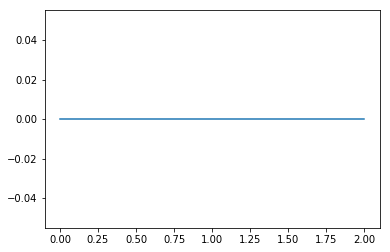

In [13]:
stationCapacity = 2
maxArrivals = 5
start = time.time()
theta = 10e-6
delta = 2
A = [0,1]
K = 30
c_f = -100
c_h = np.array([-1, -1.5, -2, -2.5, -3])
d = 0.95
S, V_k1, V_k, newPolicy, oldPolicy, E = createStates(stationCapacity, maxArrivals)
policy = policyIteration(theta, delta, S, A, E, K, stationCapacity, c_f, c_h, d, V_k1, V_k, oldPolicy, newPolicy)
end = time.time()
end - start